# Project Numerical Analysis: 'Beams and Frameworks of Beams'

## Dependencies

In [1]:
from meshes import *
from NumericalSolutions import *
from AnalyticalSolutions import *

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager


"""
For the widgets to show up, do the following in the anaconda prompt:

conda install -c conda-forge ipywidgets
jupyter labextension install @jupyter-widgets/jupyterlab-manager
"""
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual


## Generate Mesh

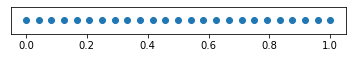

In [2]:
# Spatial resolution of mesh
N = 25

# Right limit of mesh
L = 1

# Generate 1D mesh
[nodes, elems, faces] = get_mesh_1D(N, [0,L], True)
nodes_ana = np.linspace(0, L, 100);

## Helper Functions

In [3]:
def get_both(E=1,I=1,q=0,QL=0,M0=0,ML=0,a=0,b=0,a0=0,aL=0,two_sided_support=False):
    
    if two_sided_support:
        
        # Do analytical solution
        sol_ana = AnalyticalSolutionBothEnds(a0=a0, M0=M0, aL=aL, ML=ML, case="constant", c=q, E=E, I=I, L=L)
        w_ana, wp_ana = sol_ana.solve()
        
        # Do numerical solution
        sol_num = NumericalSolutionBothEnds(ML=ML, M0=M0, a0=a0, aL=aL, E=E, I=I, N=N, L=L, q=q)
        w_num, wp_num = sol_num.solve()

    else:
        
        # Do analytical solution
        sol_ana = AnalyticalSolutionCantilever(a=a, b=b, QL=QL, ML=ML, case="constant", E=E, I=I, c=q, L=L)
        w_ana, wp_ana = sol_ana.solve()
        
        # Do numerical solution
        sol_num = NumericalSolutionCantilever(a=a, b=b, QL=QL, ML=ML, E=E, I=I, N=N, L=L, q=q)
        w_num, wp_num = sol_num.solve()
        
    return w_ana, wp_ana, w_num, wp_num

In [4]:
# colors for plotting
colors = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd',
          u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']

In [5]:
QLlist = np.arange(-4,6,2)
MLlist = np.arange(-4,6,2)
qlist = np.arange(-4,6,2)

## W vs QL

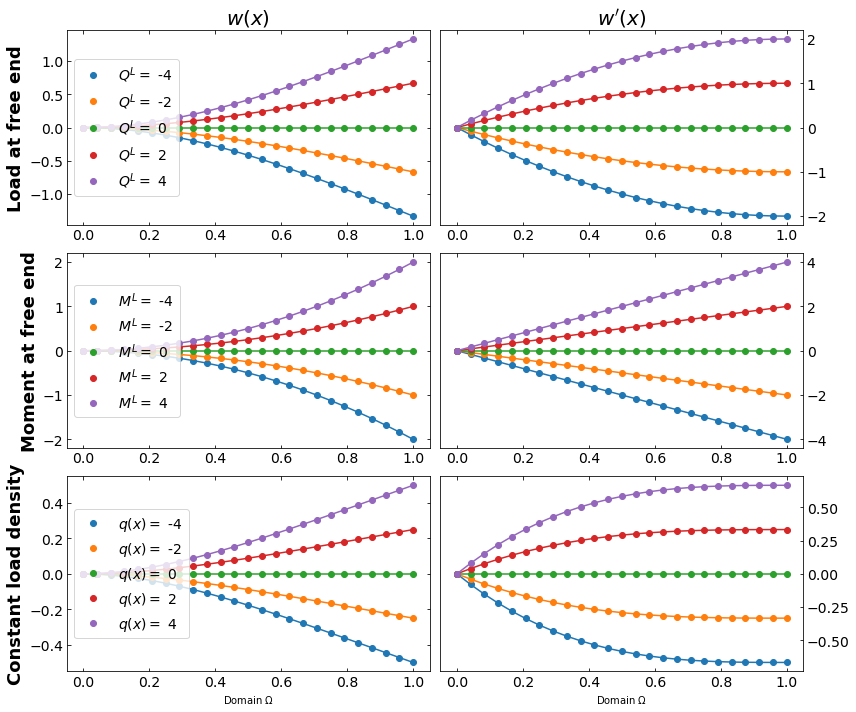

In [6]:
#plt.style.use("standard.mplstyle")

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Row 1
axes[0][0].set_title(r"$w(x)$", size=20, fontweight='bold')
axes[0][1].set_title(r"$w'(x)$", size=20, fontweight='bold')
axes[:,0][0].set_ylabel("Load at free end", rotation=90, size=18, fontweight='bold')
axes[:,0][0].tick_params(axis='both', labelsize = 14, top=True, right=True, direction='in')
axes[:,1][0].tick_params(axis='both', labelsize = 14, top=True, right=True, direction='in')

# Plots
for Q,c in zip(QLlist, colors[:len(QLlist)]):    
    w_ana, wp_ana, w_num, wp_num = get_both(QL=Q)
    
    # Left plot
    axes[:,0][0].plot(nodes,w_num,'o',c=c ,label=r'$Q^L=$ %i' % Q)
    axes[:,0][0].plot(nodes,w_ana(nodes),c=c)
    axes[:,0][0].legend(loc="center left", prop={'size': 14})
    
    # Right plot
    axes[:,1][0].plot(nodes,wp_num,'o', c=c, label=r'$Q^L=$ %i' % Q)
    axes[:,1][0].plot(nodes,wp_ana(nodes), c=c)
    #axes[:,1][0].legend(loc="center left", prop={'size': 14})
    axes[:,1][0].yaxis.tick_right()
    
# Row 2
axes[:,0][1].tick_params(axis='both', labelsize = 14, top=True, right=True, direction='in')
axes[:,1][1].tick_params(axis='both', labelsize = 14, top=True, right=True, direction='in')
axes[:,0][1].set_ylabel("Moment at free end", rotation=90, size=18, fontweight='bold')


# Plots
for M,c in zip(MLlist, colors[:len(MLlist)]):    
    w_ana, wp_ana, w_num, wp_num = get_both(ML=M)
    
    # Left plot
    axes[:,0][1].plot(nodes,w_num,'o',c=c ,label=r'$M^L=$ %i' % M)
    axes[:,0][1].plot(nodes,w_ana(nodes),c=c)
    axes[:,0][1].legend(loc="center left", prop={'size': 14})
    
    # Right plot
    axes[:,1][1].plot(nodes,wp_num,'o', c=c, label=r'$M^L=$ %i' % M)
    axes[:,1][1].plot(nodes,wp_ana(nodes), c=c)
    #axes[:,1][1].legend(loc="center left", prop={'size': 14})
    axes[:,1][1].yaxis.tick_right()


# Row 3
axes[:,0][2].set_ylabel("Constant load density", rotation=90, size=18, fontweight='bold')
axes[:,0][2].tick_params(axis='both', labelsize = 14, top=True, right=True, direction='in')
axes[:,1][2].tick_params(axis='both', labelsize = 14, top=True, right=True, direction='in')

# Plots
for q,c in zip(qlist, colors[:len(qlist)]):    
    w_ana, wp_ana, w_num, wp_num = get_both(q=q)
    
    # Left plot
    axes[:,0][2].plot(nodes,w_num,'o',c=c ,label=r'$q(x)=$ %i' % q)
    axes[:,0][2].plot(nodes,w_ana(nodes),c=c)
    axes[:,0][2].legend(loc="center left", prop={'size': 14})
    axes[:,0][2].set_xlabel(r"Domain $\Omega$")
    
    # Right plot
    axes[:,1][2].plot(nodes,wp_num,'o', c=c, label=r'$q(x)=$ %i' % q)
    axes[:,1][2].plot(nodes,wp_ana(nodes), c=c)
    #axes[:,1][2].legend(loc="center left", prop={'size': 14})
    axes[:,1][2].set_xlabel(r"Domain $\Omega$")
    axes[:,1][2].yaxis.tick_right()


#for ax, row in zip(axes[:,0], rows):
 #   ax.set_ylabel(row, rotation=90, size='large')

fig.tight_layout()
plt.show()


# 1st plot to use in report

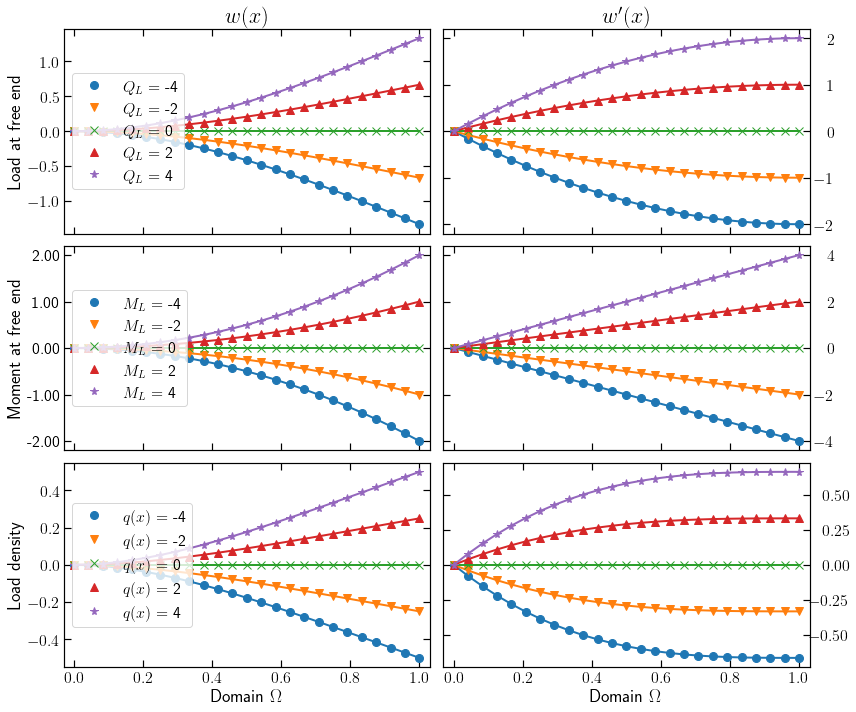

In [7]:
plt.style.use("standard.mplstyle")

from matplotlib.ticker import FormatStrFormatter


fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

plt.setp(axes, xlim=(-0.03,1.03))

markers = ["o", "v", "x", "^", "*"]

# Row 1

axes[0][0].set_title(r"$w(x)$")
axes[0][1].set_title(r"$w'(x)$")


axes[:,0][0].set_ylabel("Load at free end", rotation=90)

# Plots
for Q,c, m in zip(QLlist, colors[:len(QLlist)], markers):    
    w_ana, wp_ana, w_num, wp_num = get_both(QL=Q)
    
    # Left plot
    axes[:,0][0].plot(nodes,w_num,m,c=c ,label=r'$Q_L=$ %i' % Q)
    axes[:,0][0].plot(nodes,w_ana(nodes),c=c)
    axes[:,0][0].legend(loc="center left", prop={'size': 16})
    
    axes[:,0][0].tick_params(axis='x', which='both', labelbottom=False, labeltop=False)
    
    # Right plot
    axes[:,1][0].plot(nodes,wp_num,m, c=c, label=r'$Q_L=$ %i' % Q)
    axes[:,1][0].plot(nodes,wp_ana(nodes), c=c, label='Analytical solution')
    #axes[:,1][0].legend(loc="center left", prop={'size': 10})
    
    axes[:,1][0].tick_params(axis='x', which='both', labelbottom=False, labeltop=False)
    
    for label in axes[:,1][0].get_yticklabels():
        label.set_horizontalalignment('right')
    
    axes[:,1][0].tick_params(axis='y', which='both', labelleft=False, labelright=True, pad=25)
    
# Row 2
axes[:,0][1].set_ylabel("Moment at free end", rotation=90)


# Plots
for M,c, m in zip(MLlist, colors[:len(MLlist)], markers):    
    w_ana, wp_ana, w_num, wp_num = get_both(ML=M)
    
    # Left plot
    axes[:,0][1].plot(nodes,w_num,m,c=c ,label=r'$M_L=$ %i' % M)
    axes[:,0][1].plot(nodes,w_ana(nodes),c=c)
    axes[:,0][1].legend(loc="center left", prop={'size': 16})
    
    axes[:,0][1].xaxis.set_ticklabels([])
    
    axes[:,0][1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    
    # Right plot
    axes[:,1][1].plot(nodes,wp_num,m, c=c, label=r'$M_L=$ %i' % M)
    axes[:,1][1].plot(nodes,wp_ana(nodes), c=c)
    #axes[:,1][1].legend(loc="center left", prop={'size': 10})
    
    axes[:,1][1].xaxis.set_ticklabels([])
    
    for label in axes[:,1][1].get_yticklabels():
        label.set_horizontalalignment('right')
    
    axes[:,1][1].tick_params(axis='y', which='both', labelleft=False, labelright=True, pad=25)


# Row 3
axes[:,0][2].set_ylabel("Load density", rotation=90)

# Plots
for q,c, m in zip(qlist, colors[:len(qlist)], markers):    
    w_ana, wp_ana, w_num, wp_num = get_both(q=q)
    
    # Left plot
    axes[:,0][2].plot(nodes,w_num,m,c=c ,label=r'$q(x)=$ %i' % q)
    axes[:,0][2].plot(nodes,w_ana(nodes),c=c)
    axes[:,0][2].legend(loc="center left", prop={'size': 16})
    axes[:,0][2].set_xlabel(r"Domain $\Omega$")
    
    # Right plot
    axes[:,1][2].plot(nodes,wp_num,m, c=c, label=r'$q(x)=$ %i' % q)
    axes[:,1][2].plot(nodes,wp_ana(nodes), c=c)
    #axes[:,1][2].legend(loc="center left", prop={'size': 10})
    axes[:,1][2].set_xlabel(r"Domain $\Omega$")
    
    for label in axes[:,1][2].get_yticklabels():
        label.set_horizontalalignment('right')
    
    axes[:,1][2].tick_params(axis='y', which='both', labelleft=False, labelright=True, pad=40)



fig.tight_layout()

plt.savefig("./Report/Parameter_dependence.pdf")
plt.savefig("./Report/Parameter_dependence_support.jpeg")
plt.show()


## 2nd plot to use in report

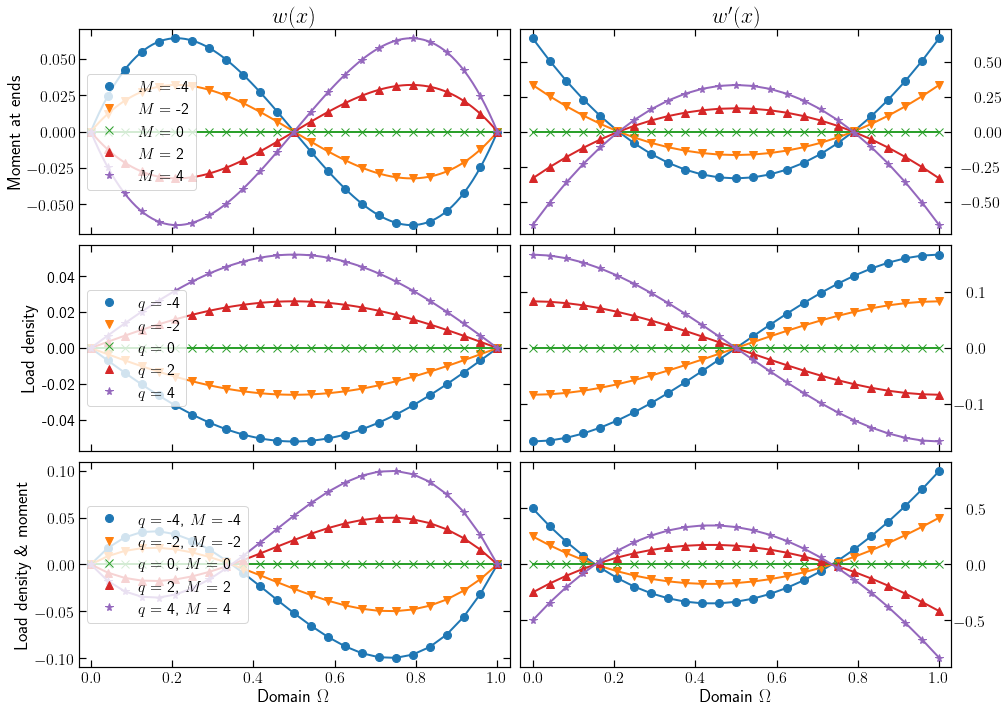

In [8]:
plt.style.use("standard.mplstyle")

from matplotlib.ticker import FormatStrFormatter


fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
#fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10), sharex=True, sharey=True)
plt.setp(axes, xlim=(-0.03,1.03))

markers = ["o", "v", "x", "^", "*"]

# Row 1
axes[0][0].set_title(r"$w(x)$")
axes[0][1].set_title(r"$w'(x)$")


axes[:,0][0].set_ylabel("Moment at ends", rotation=90)

# Plots
for M, c, m in zip(MLlist, colors[:len(MLlist)], markers):    
    w_ana, wp_ana, w_num, wp_num = get_both(M0=M, ML=-M, two_sided_support=True)
    
    # Left plot
    axes[:,0][0].plot(nodes,w_num,m,c=c ,label=r'$M=$ %i' % M)
    axes[:,0][0].plot(nodes_ana,w_ana(nodes_ana),c=c)
    axes[:,0][0].legend(loc="center left", prop={'size': 16})
    
    axes[:,0][0].tick_params(axis='x', which='both', labelbottom=False, labeltop=False)
    
    # Right plot
    axes[:,1][0].plot(nodes,wp_num,m, c=c, label=r'$M=$ %i' % M)
    axes[:,1][0].plot(nodes,wp_ana(nodes), c=c, label='Analytical solution')
    #axes[:,1][0].legend(loc="center left", prop={'size': 10})
    
    axes[:,1][0].tick_params(axis='x', which='both', labelbottom=False, labeltop=False)
    
    for label in axes[:,1][0].get_yticklabels():
        label.set_horizontalalignment('right')
    
    axes[:,1][0].tick_params(axis='y', which='both', labelleft=False, labelright=True, pad=50)
    
# Row 2
axes[:,0][1].set_ylabel("Load density", rotation=90)


# Plots
for q,c, m in zip(qlist, colors[:len(MLlist)], markers):    
    w_ana, wp_ana, w_num, wp_num = get_both(q=q, two_sided_support=True)
    
    # Left plot
    axes[:,0][1].plot(nodes,w_num,m,c=c ,label=r'$q=$ %i' % q)
    axes[:,0][1].plot(nodes_ana,w_ana(nodes_ana),c=c)
    axes[:,0][1].legend(loc="center left", prop={'size': 16})
    
    axes[:,0][1].xaxis.set_ticklabels([])
    
    axes[:,0][1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    
    # Right plot
    axes[:,1][1].plot(nodes,wp_num,m, c=c, label=r'$M^L=$ %i' % M)
    axes[:,1][1].plot(nodes,wp_ana(nodes), c=c)
    #axes[:,1][1].legend(loc="center left", prop={'size': 10})
    
    axes[:,1][1].xaxis.set_ticklabels([])
    
    for label in axes[:,1][1].get_yticklabels():
        label.set_horizontalalignment('right')
    
    axes[:,1][1].tick_params(axis='y', which='both', labelleft=False, labelright=True, pad=35)


# Row 3
axes[:,0][2].set_ylabel("Load density \& moment", rotation=90)

# Plots
for M, q, c, m in zip(MLlist, qlist, colors[:len(qlist)], markers):    
    w_ana, wp_ana, w_num, wp_num = get_both(q=q, M0=M, ML=-M, two_sided_support=True)
    
    # Left plot
    axes[:,0][2].plot(nodes,w_num,m,c=c ,label=r'$q=$ %i' % q + ', $M=$ %i' % M)
    axes[:,0][2].plot(nodes,w_ana(nodes),c=c)
    axes[:,0][2].legend(loc="center left", prop={'size': 16})
    axes[:,0][2].set_xlabel(r"Domain $\Omega$")
    
    # Right plot
    axes[:,1][2].plot(nodes,wp_num,m, c=c, label=r'$q=$ %i' % q)
    axes[:,1][2].plot(nodes,wp_ana(nodes), c=c)
    #axes[:,1][2].legend(loc="center left", prop={'size': 10})
    axes[:,1][2].set_xlabel(r"Domain $\Omega$")
    
    for label in axes[:,1][2].get_yticklabels():
        label.set_horizontalalignment('right')
    
    axes[:,1][2].tick_params(axis='y', which='both', labelleft=False, labelright=True, pad=35)



fig.tight_layout()

plt.savefig("./Report/Parameter_dependence_support.pdf")
plt.savefig("./Report/Parameter_dependence_support.jpeg")
plt.show()


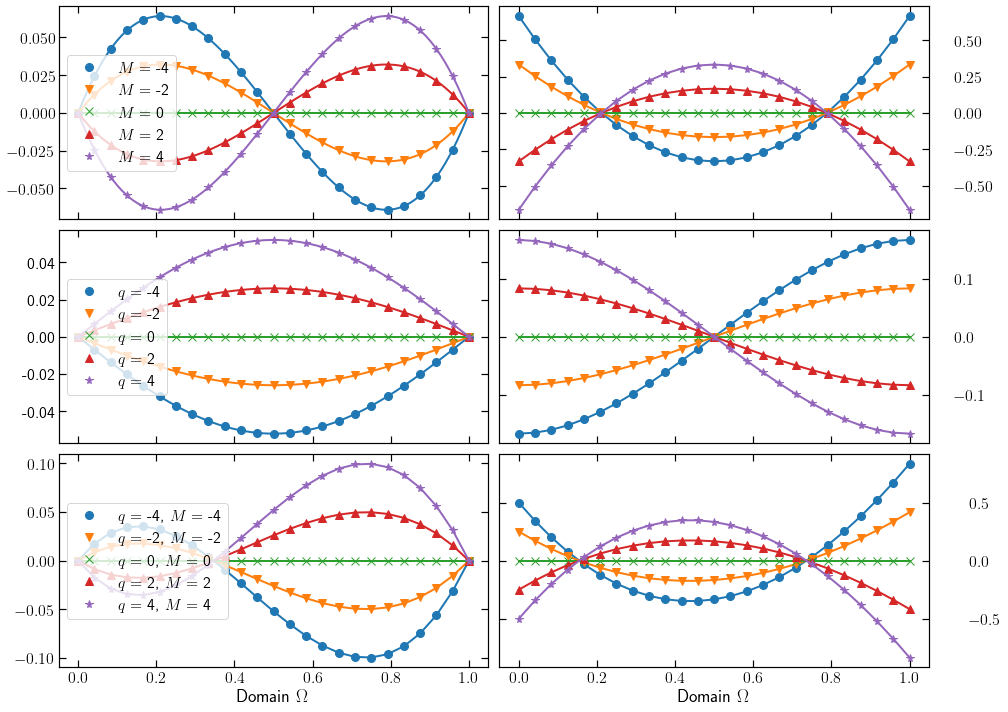

In [21]:
plt.style.use("standard.mplstyle")

from matplotlib.ticker import FormatStrFormatter


fig,  ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
#fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10), sharex=True, sharey=True)
plt.setp(axes, xlim=(-0.03,1.03))

markers = ["o", "v", "x", "^", "*"]

# Row 1
#axes[0][0].set_title(r"$w(x)$")
#axes[0][1].set_title(r"$w'(x)$")
#fig.suptitle("Moment at ends", fontsize="large")

#axes[:,0][0].set_ylabel("Moment at ends", rotation=90)

# Plots
for M, c, m in zip(MLlist, colors[:len(MLlist)], markers):    
    w_ana, wp_ana, w_num, wp_num = get_both(M0=M, ML=-M, two_sided_support=True)
    
    # Left plot
    ax1.plot(nodes,w_num,m,c=c ,label=r'$M=$ %i' % M)
    ax1.plot(nodes_ana,w_ana(nodes_ana),c=c)
    ax1.legend(loc="center left", prop={'size': 16})
    
    ax1.tick_params(axis='x', which='both', labelbottom=False, labeltop=False)
    
    # Right plot
    ax2.plot(nodes,wp_num,m, c=c, label=r'$M=$ %i' % M)
    ax2.plot(nodes,wp_ana(nodes), c=c, label='Analytical solution')
    #axes[:,1][0].legend(loc="center left", prop={'size': 10})
    
    ax2.tick_params(axis='x', which='both', labelbottom=False, labeltop=False)
    
    for label in axes[:,1][0].get_yticklabels():
        label.set_horizontalalignment('right')
    
    ax2.tick_params(axis='y', which='both', labelleft=False, labelright=True, pad=25)
    
# Row 2
#axes[:,0][1].set_ylabel("Load density", rotation=90)


# Plots
for q,c, m in zip(qlist, colors[:len(MLlist)], markers):    
    w_ana, wp_ana, w_num, wp_num = get_both(q=q, two_sided_support=True)
    
    # Left plot
    ax3.plot(nodes,w_num,m,c=c ,label=r'$q=$ %i' % q)
    ax3.plot(nodes_ana,w_ana(nodes_ana),c=c)
    ax3.legend(loc="center left", prop={'size': 16})
    
    ax3.xaxis.set_ticklabels([])
    
    ax3.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    
    # Right plot
    ax4.plot(nodes,wp_num,m, c=c, label=r'$M^L=$ %i' % M)
    ax4.plot(nodes,wp_ana(nodes), c=c)
    #axes[:,1][1].legend(loc="center left", prop={'size': 10})
    
    ax4.xaxis.set_ticklabels([])
    
    for label in axes[:,1][1].get_yticklabels():
        label.set_horizontalalignment('right')
    
    ax4.tick_params(axis='y', which='both', labelleft=False, labelright=True, pad=25)


# Row 3
#axes[:,0][2].set_ylabel("Load density \& moment", rotation=90)

# Plots
for M, q, c, m in zip(MLlist, qlist, colors[:len(qlist)], markers):    
    w_ana, wp_ana, w_num, wp_num = get_both(q=q, M0=M, ML=-M, two_sided_support=True)
    
    # Left plot
    ax5.plot(nodes,w_num,m,c=c ,label=r'$q=$ %i' % q + ', $M=$ %i' % M)
    ax5.plot(nodes,w_ana(nodes),c=c)
    ax5.legend(loc="center left", prop={'size': 16})
    ax5.set_xlabel(r"Domain $\Omega$")
    
    # Right plot
    ax6.plot(nodes,wp_num,m, c=c, label=r'$q=$ %i' % q)
    ax6.plot(nodes,wp_ana(nodes), c=c)
    #axes[:,1][2].legend(loc="center left", prop={'size': 10})
    ax6.set_xlabel(r"Domain $\Omega$")
    
    for label in axes[:,1][2].get_yticklabels():
        label.set_horizontalalignment('right')
    
    ax6.tick_params(axis='y', which='both', labelleft=False, labelright=True, pad=40)



fig.tight_layout()

#plt.savefig("./Report/Parameter_dependence_support.pdf")
plt.show()


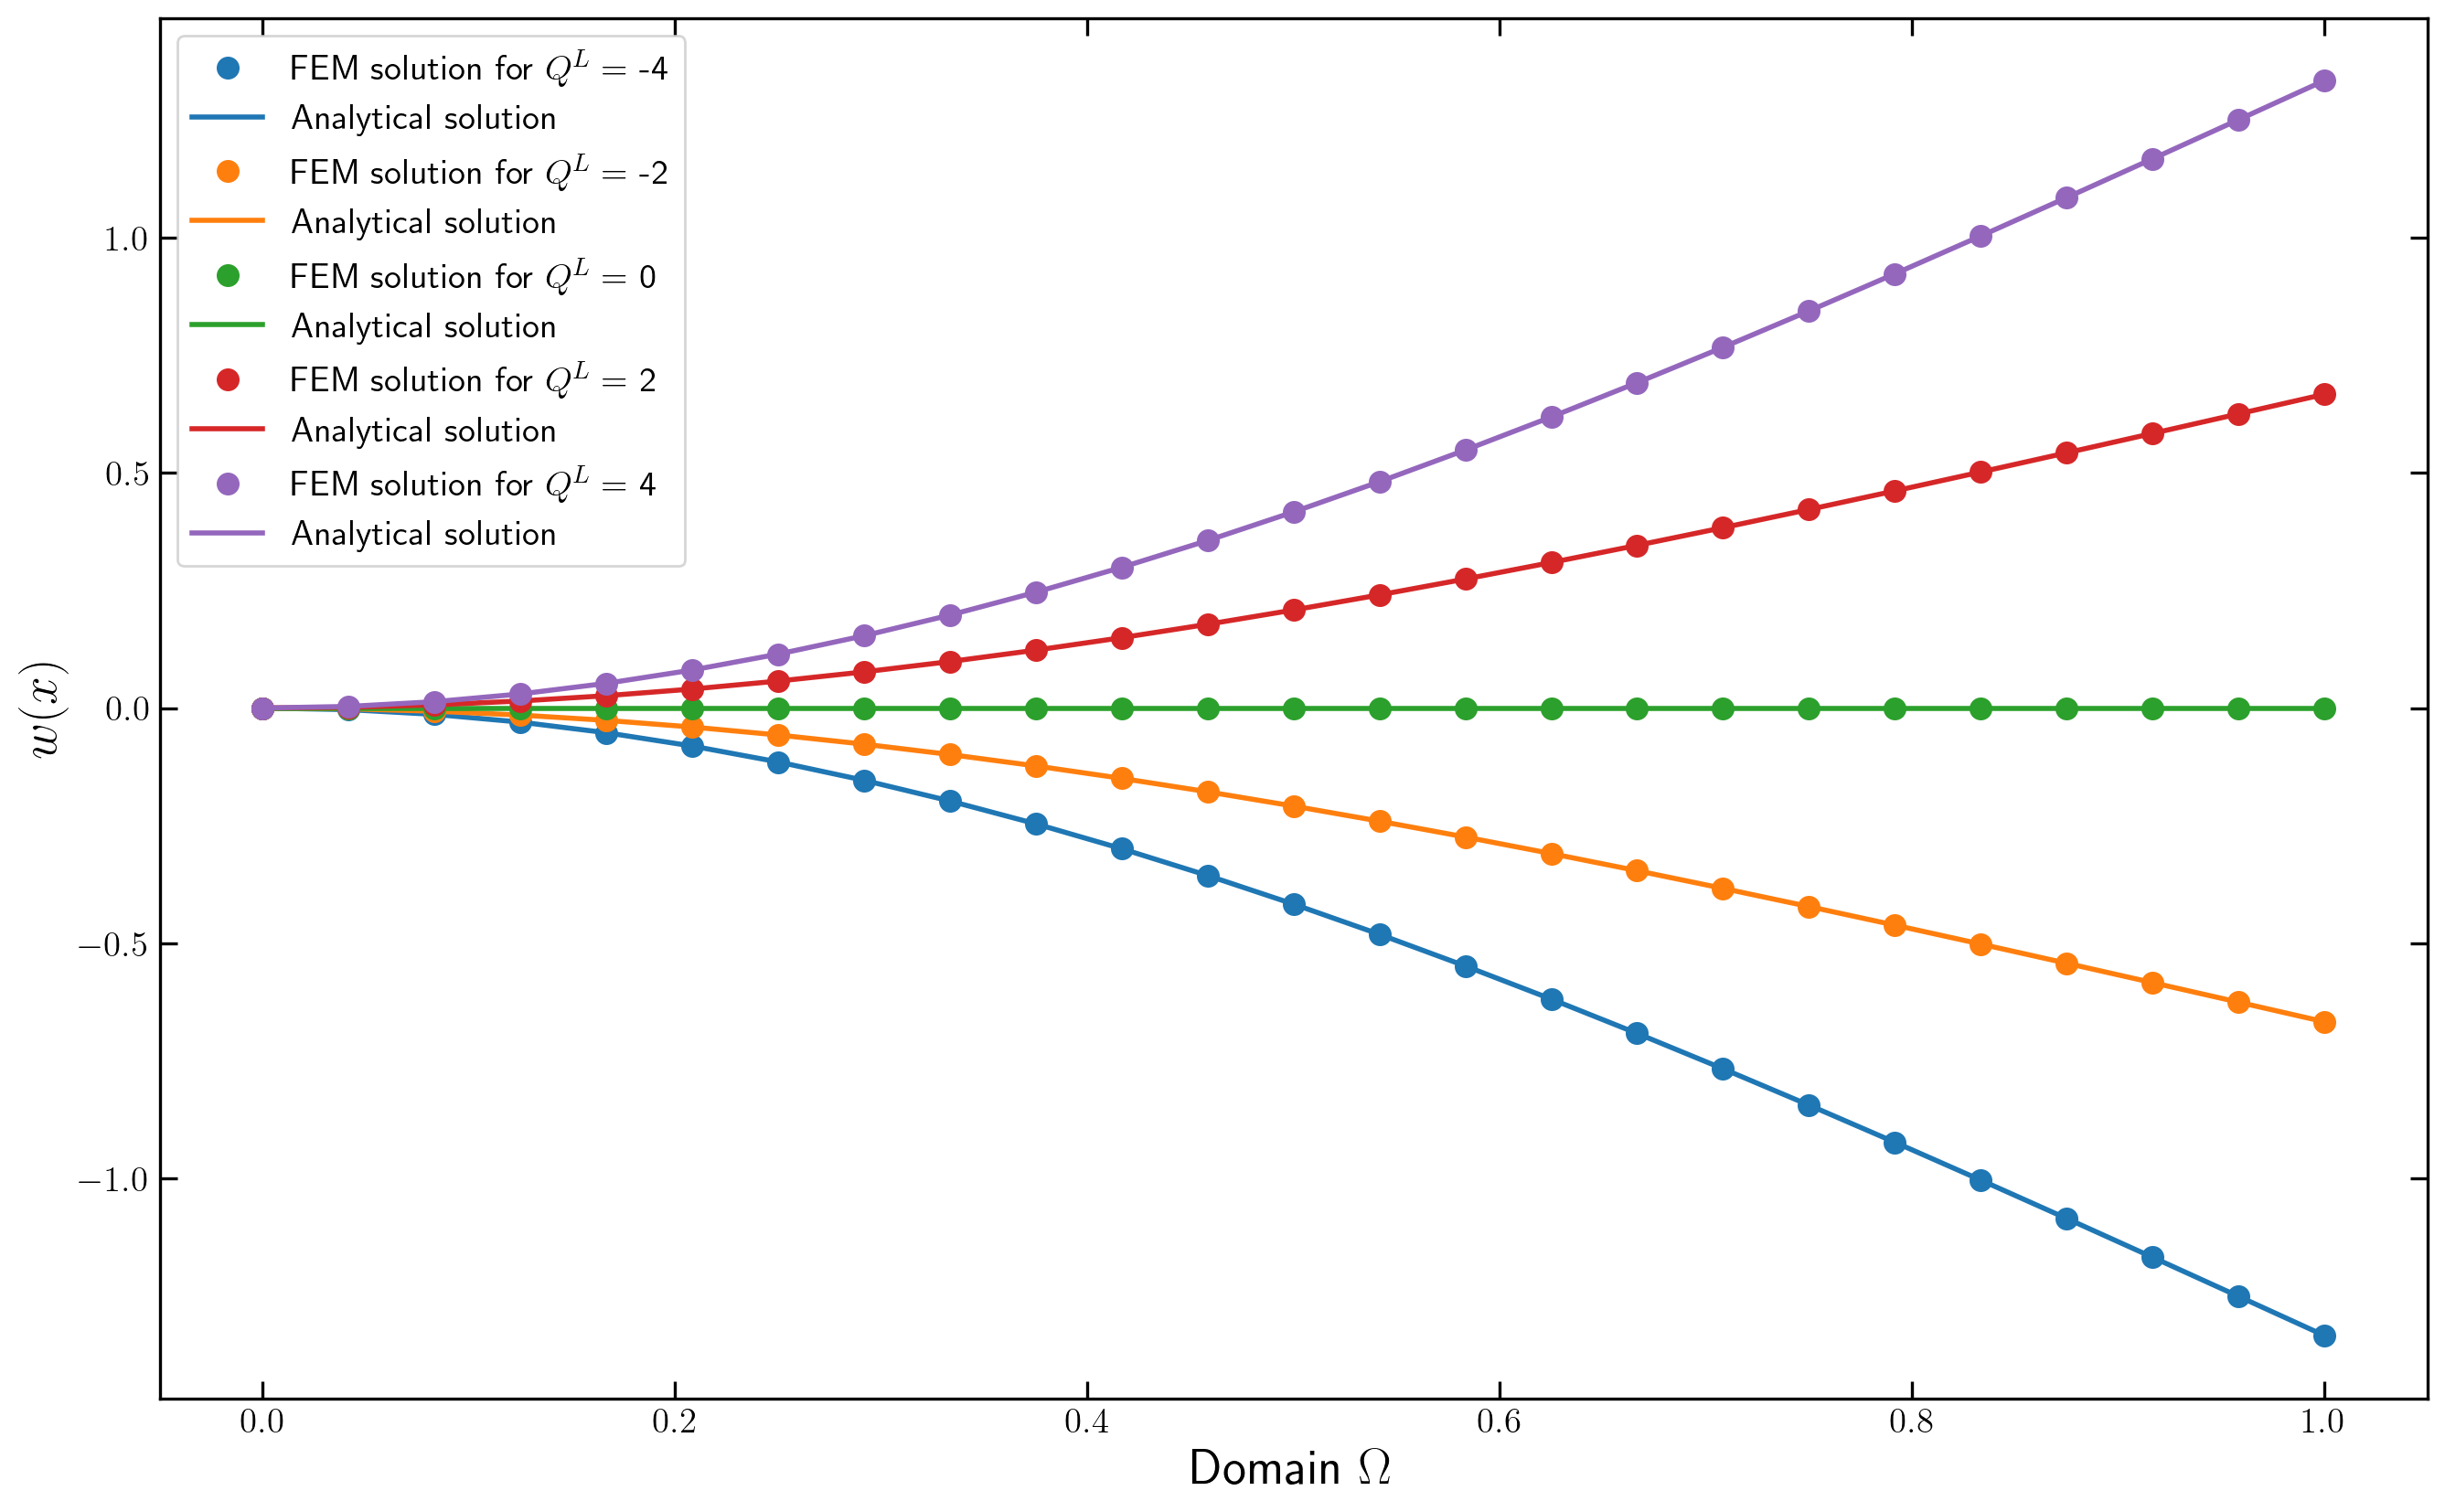

In [10]:
QLlist = np.arange(-4,6,2)

plt.figure(figsize=(16, 10), dpi=200)

assert len(QLlist) <= len(colors)
for Q,c in zip(QLlist, colors[:len(QLlist)]):    
    w_ana, wp_ana, w_num, wp_num = get_both(QL=Q)
    
    plt.plot(nodes,w_num,'o',c=c ,label=r'FEM solution for $Q^L=$ %i' % Q)
    plt.plot(nodes,w_ana(nodes),c=c, label='Analytical solution')
    plt.legend(loc="upper left", prop={'size': 14})
    plt.xlabel(r"Domain $\Omega$",size=20)
    plt.ylabel(r"$w(x)$",size=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

## W' vs QL

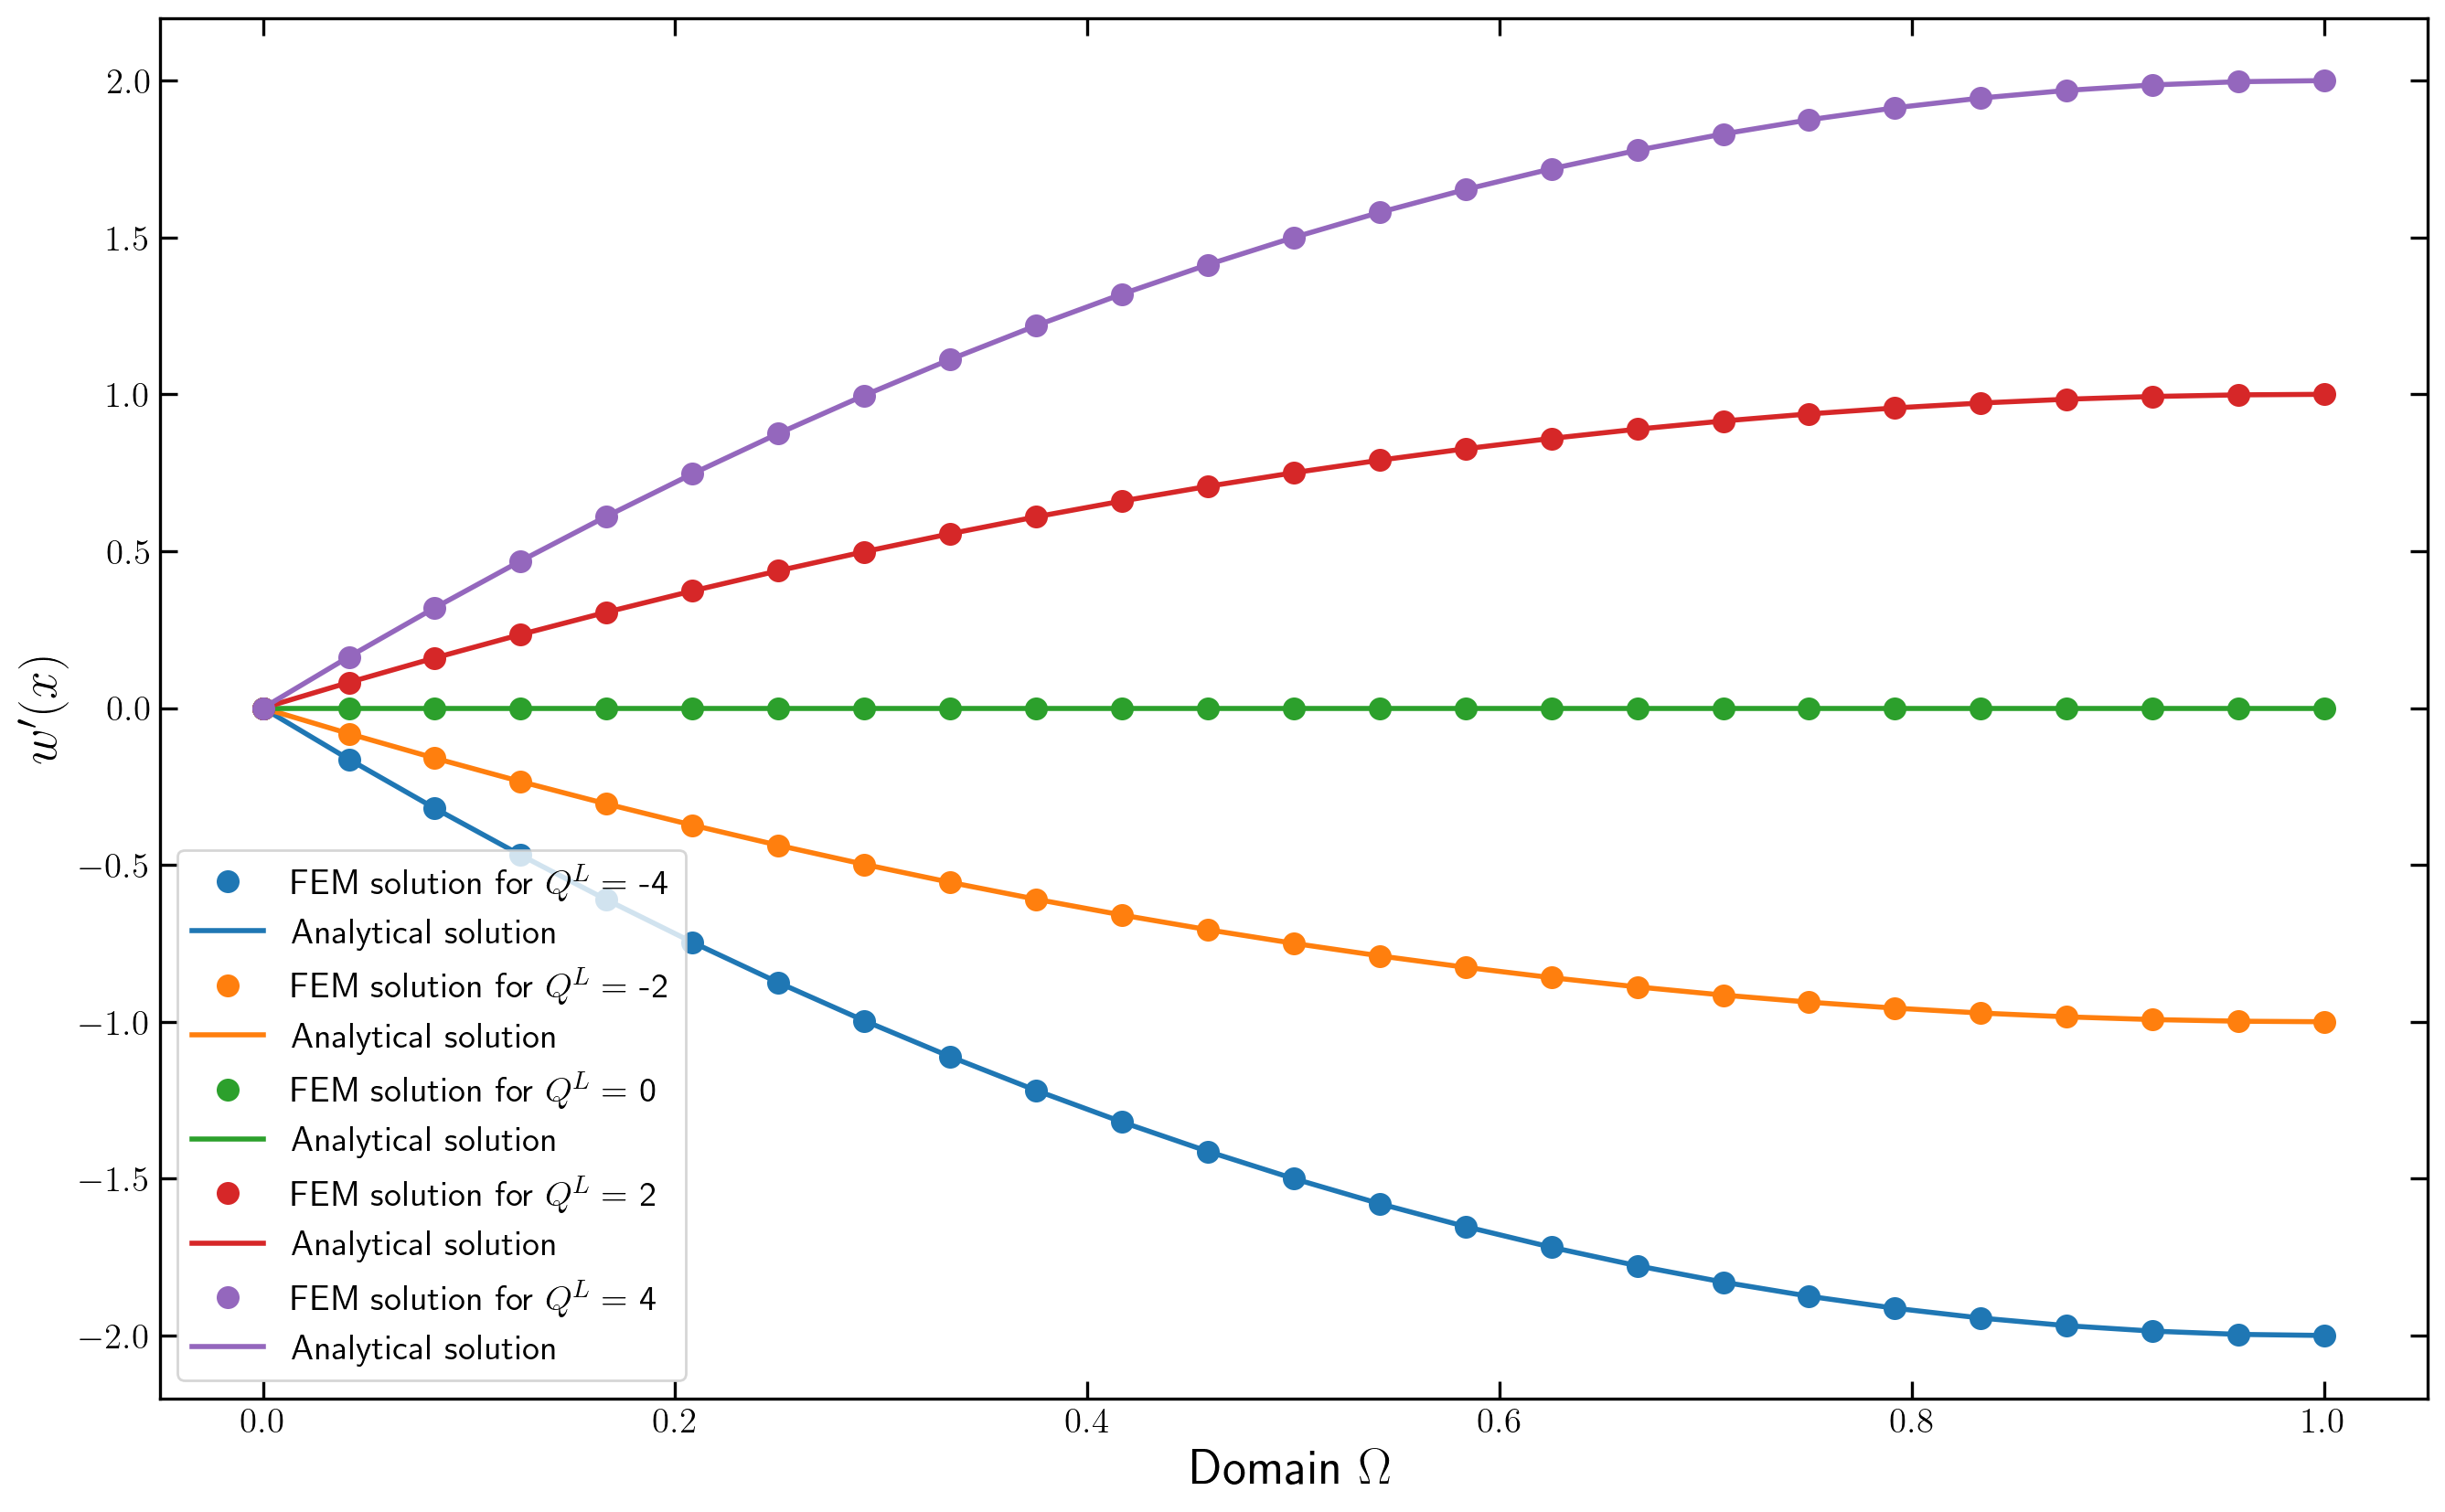

In [11]:
QLlist = np.arange(-4,6,2)
plt.figure(figsize=(16, 10), dpi=200)

for Q,c in zip(QLlist, colors):    
    w_ana, wp_ana, w_num, wp_num = get_both(QL=Q)
    
    plt.plot(nodes,wp_num,'o', c=c, label=r'FEM solution for $Q^L=$ %i' % Q)
    plt.plot(nodes,wp_ana(nodes), c=c, label='Analytical solution')
    plt.legend(loc="lower left", prop={'size': 14})
    plt.xlabel(r"Domain $\Omega$",size=20)
    plt.ylabel(r"$w'(x)$",size=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

## W vs ML

In [ ]:
MLlist = np.arange(-4,6,2)

plt.figure(figsize=(16, 10), dpi=200)

assert len(QLlist) <= len(colors)
for M,c in zip(QLlist, colors[:len(MLlist)]):    
    w_ana, wp_ana, w_num, wp_num = get_both(ML=M)
    
    plt.plot(nodes,w_num,'o',c=c ,label=r'FEM solution for $M^L=$ %i' % M)
    plt.plot(nodes,w_ana(nodes),c=c, label='Analytical solution')
    plt.legend(loc="upper left", prop={'size': 14})
    plt.xlabel(r"Domain $\Omega$",size=20)
    plt.ylabel(r"$w(x)$",size=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

## W' vs ML

In [ ]:
MLlist = np.arange(-4,6,2)

plt.figure(figsize=(16, 10), dpi=200)

assert len(QLlist) <= len(colors)
for M,c in zip(QLlist, colors[:len(MLlist)]):    
    w_ana, wp_ana, w_num, wp_num = get_both(ML=M)
    
    plt.plot(nodes,wp_num,'o',c=c ,label=r'FEM solution for $M^L=$ %i' % M)
    plt.plot(nodes,wp_ana(nodes),c=c, label='Analytical solution')
    plt.legend(loc="upper left", prop={'size': 14})
    plt.xlabel(r"Domain $\Omega$",size=20)
    plt.ylabel(r"$w'(x)$",size=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

## W vs q

In [ ]:
qlist = np.arange(-4,6,2)
plt.figure(figsize=(16, 10), dpi=200)

for q,c in zip(qlist, colors[:len(qlist)]):       
    w_ana, wp_ana, w_num, wp_num = get_both(q=q)
    
    plt.plot(nodes,w_num,'o', c=c, label=r'FEM solution for $q(x)=$ %i' % q)
    plt.plot(nodes,w_ana(nodes), c=c, label='Analytical solution')
    plt.legend(loc="upper left", prop={'size': 14})
    plt.xlabel(r"Domain $\Omega$",size=20)
    plt.ylabel(r"$w(x)$",size=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

## W' vs q

In [ ]:
qlist = np.arange(-4,6,2)
plt.figure(figsize=(16, 10), dpi=200)

for q,c in zip(qlist, colors[:len(qlist)]):           
    w_ana, wp_ana, w_num, wp_num = get_both(q=q)
    
    plt.plot(nodes,wp_num,'o', c=c, label=r'FEM solution for $q(x)=$ %i' % q)
    plt.plot(nodes,wp_ana(nodes), c=c, label='Analytical solution')
    plt.legend(loc="upper left", prop={'size': 14})
    plt.xlabel(r"Domain $\Omega$",size=20)
    plt.ylabel(r"$w'(x)$",size=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

## W vs q, Supported at Both Ends

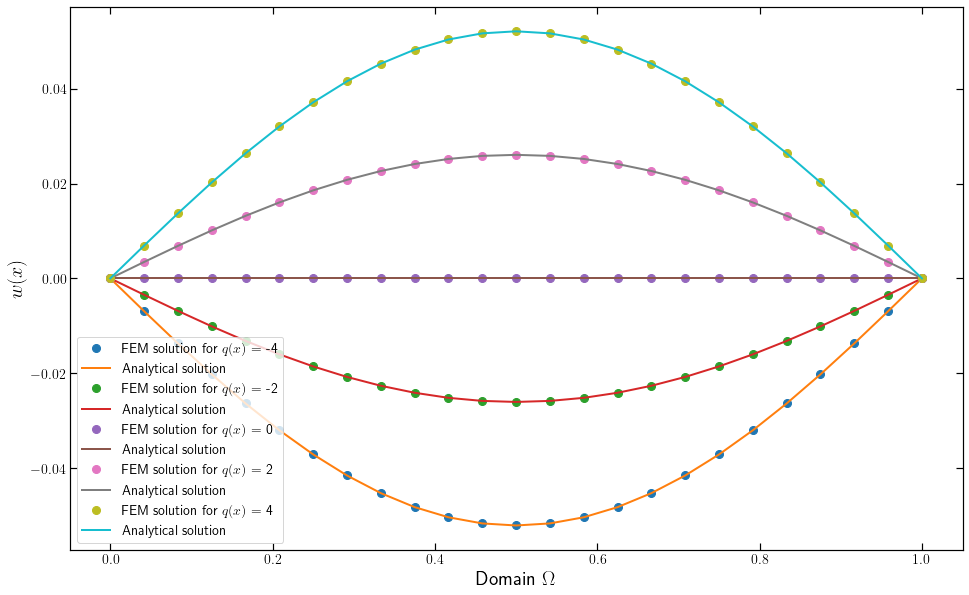

In [16]:
qlist = np.arange(-4,6,2)
plt.figure(figsize=(16, 10))

for q in qlist:    
    w_ana, wp_ana, w_num, wp_num = get_both(q=q, two_sided_support=True)
    
    plt.plot(nodes,w_num,'o',label=r'FEM solution for $q(x)=$ %i' % q)
    plt.plot(nodes,w_ana(nodes),label='Analytical solution')
    plt.legend(loc="lower left", prop={'size': 14})
    plt.xlabel(r"Domain $\Omega$",size=20)
    plt.ylabel(r"$w(x)$",size=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

plt.savefig('W-vs-q-double-support.pdf', format='pdf', dpi=200 ,bbox_inches='tight')

## W' vs q, Supported at Both Ends

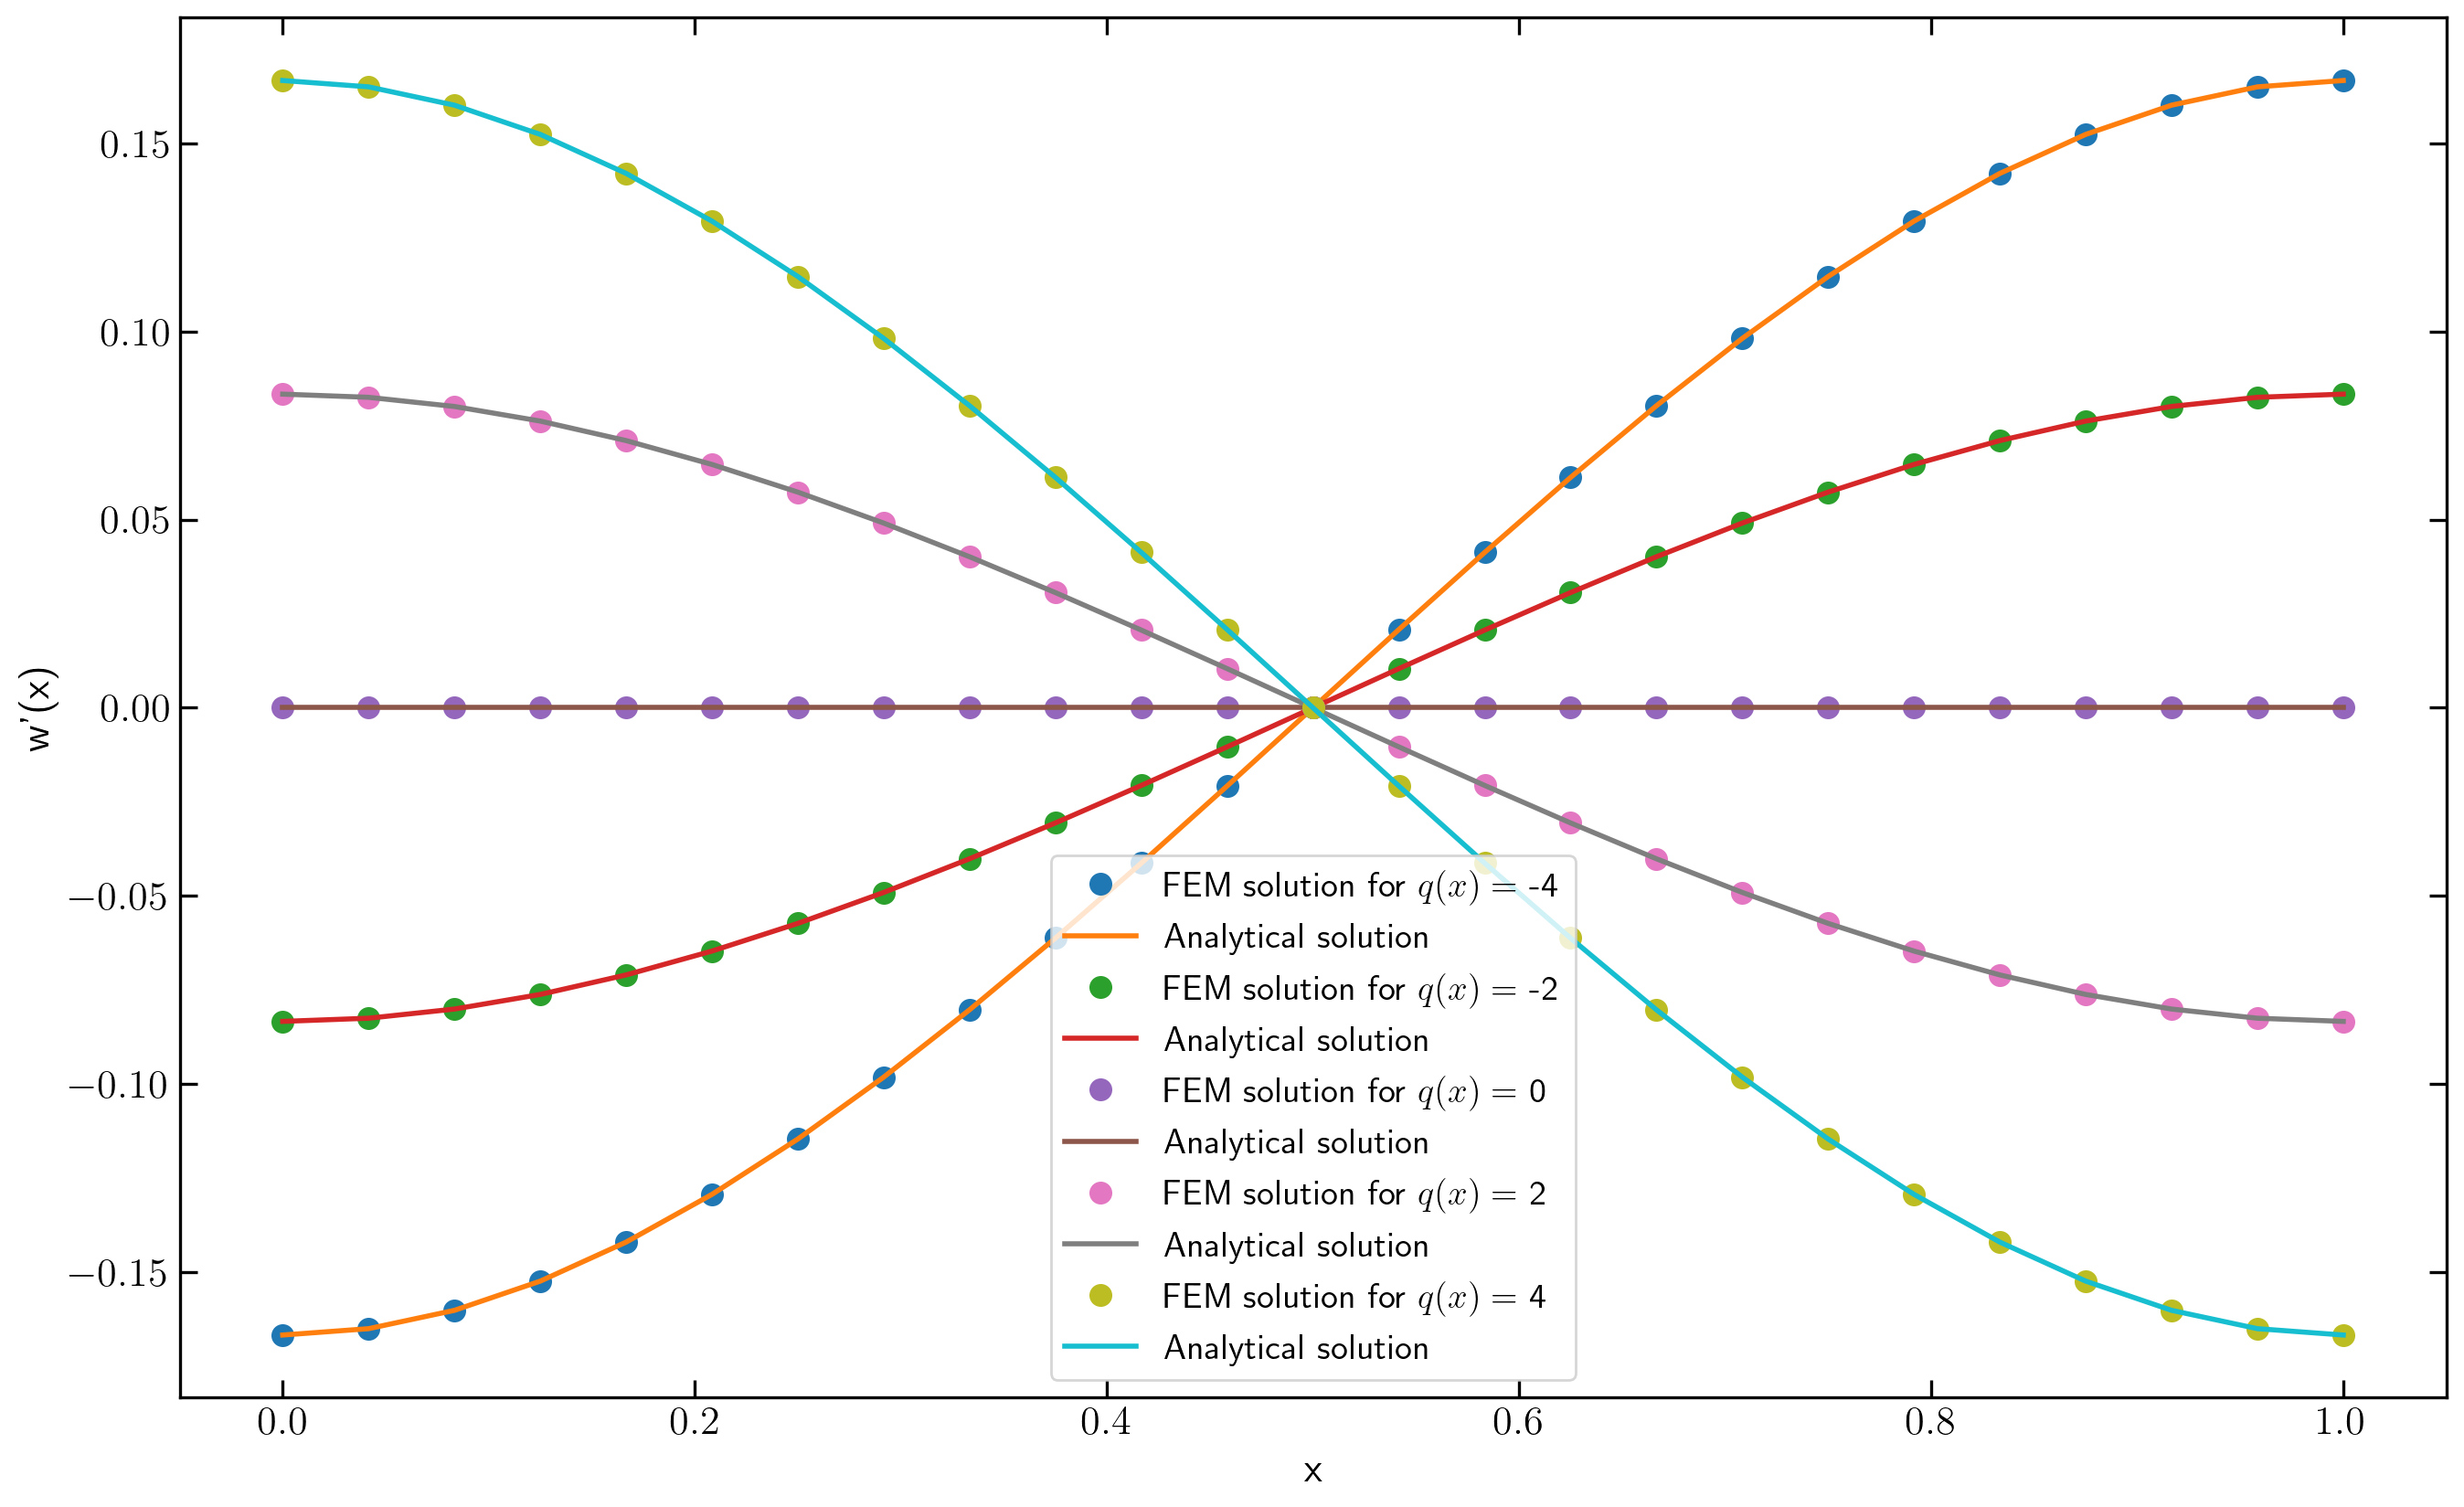

In [17]:
qlist = np.arange(-4,6,2)
plt.figure(figsize=(16, 10), dpi=200)

for q in qlist:    
    w_ana, wp_ana, w_num, wp_num = get_both(q=q, two_sided_support=True)
    
    plt.plot(nodes,wp_num,'o',label=r'FEM solution for $q(x)=$ %i' % q)
    plt.plot(nodes,wp_ana(nodes),label='Analytical solution')
    plt.legend(loc="lower center", prop={'size': 14})
    plt.ylabel("w'(x)",size=16)
    plt.xlabel("x",size=16)

## Interactive Analytical Solution Plots
### Supported on One End

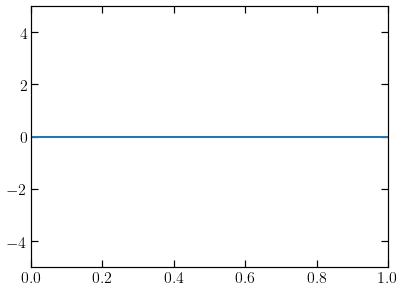

In [18]:
x = np.linspace(0,L,N)

def f(a, b, QL, ML, x0, Load, LoadConstant):
    sol_ana = AnalyticalSolutionCantilever(a=a, b=b, QL=QL, ML=ML, x0=x0, case=Load, L=L, c=LoadConstant, q=lambda x:x)
    w_ana,_ = sol_ana.solve()
    plt.plot(x, w_ana(x))
    plt.xlim(0,1)
    plt.ylim(-5,5)
interact(f, a=(-20.0,20.0), b=(-5.0,5.0), QL=(-2.0,2.0), ML=(-2.0,2.0), x0=(0.0, 5.0), Load=["constant", "delta", "arbitrary function"], LoadConstant = (-15.0,15.0))
plt.show()

### Supported on Both Ends

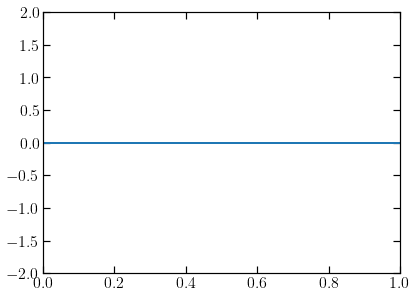

In [19]:
x = np.linspace(0,L,N)

def g(A1, B1, A2, B2, x0, Load, LoadConstant):
    sol_ana = AnalyticalSolutionBothEnds(a0=A1, aL=B1, M0=A2, ML=B2, x0=x0, case=Load, L=L, c=LoadConstant, q=lambda x:x)
    w_ana,_ =  sol_ana.solve()
    plt.plot(x, w_ana(x))
    plt.xlim(0,1)
    plt.ylim(-2,2)
interact(g, A1=(-20.0,20.0), B1=(-20.0,20.0), A2=(-20.0,20.0), B2=(-20.0,20.0), x0=(0.0, 5.0), Load=["constant", "delta", "arbitrary function"], LoadConstant = (-15.0,15.0))
plt.show()